In [1]:
import cv2
import os
import glob
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
plt.rcParams["font.family"] = "Arial"

import torch

# Visualize training data results

In [2]:
# With class weights in criterion
path = '/home/dieumynguyen/BeeSegmentation/data/processed/training_metrics_transpose.pt'

In [3]:
xxx = torch.load(path)

In [4]:
num_t = len(xxx['losses']['train'])
num_t

1011

In [5]:
train_accs = xxx['accs']['train']
train_mious = xxx['mious']['train']
train_losses = xxx['losses']['train']
train_tprs = xxx['true_positive_rates']['train']

In [6]:
val_accs = xxx['accs']['val']
val_mious = xxx['mious']['val']
val_losses = xxx['losses']['val']
val_tprs = xxx['true_positive_rates']['val']

(-0.01, 0.2)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


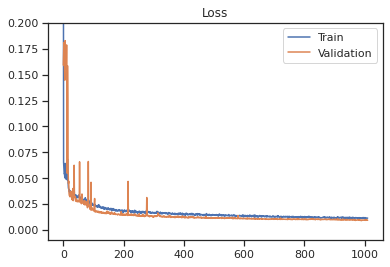

In [7]:
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.legend()
plt.title('Loss');
plt.ylim(-0.01, 0.2)

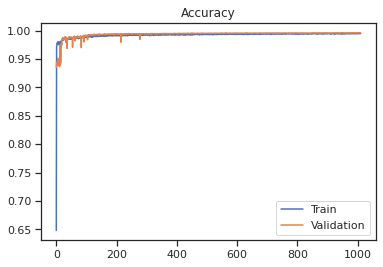

In [8]:
plt.plot(train_accs, label='Train')
plt.plot(val_accs, label='Validation')
plt.legend()
plt.title('Accuracy');

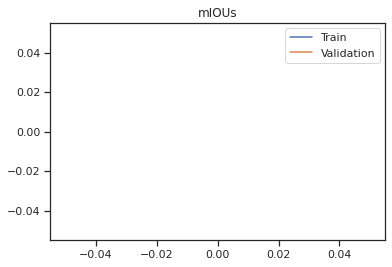

In [9]:
plt.plot(train_mious, label='Train')
plt.plot(val_mious, label='Validation')
plt.legend()
plt.title('mIOUs');

In [14]:
max(xxx['true_positive_rates']['train']), max(xxx['true_positive_rates']['val']), xxx['true_positive_rates']['val'][num_t-1]

(0.9446304788176408, 0.9644689349759281, 0.9591351483921414)

In [15]:
np.argmax(xxx['true_positive_rates']['val'])

902

In [16]:
lengths = np.arange(400, len(xxx['true_positive_rates']['val']))

In [17]:
best = 0
best_arg = 0
for l in lengths:
    try:
        tpr = xxx['true_positive_rates']['val'][l]
    except:
        continue
    if tpr > best:
        best = tpr
        best_arg = l

In [18]:
best, best_arg

(0.9644689349759281, 902)

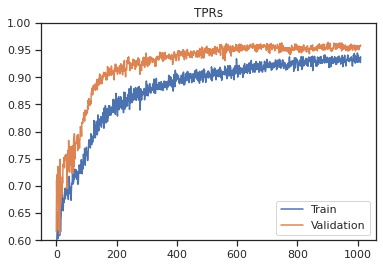

In [19]:
plt.plot(train_tprs, label='Train')
plt.plot(val_tprs, label='Validation')
plt.legend()
plt.title('TPRs');
plt.ylim(0.6, 1.0);